In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.ticker as ticker
from sklearn import datasets
import csv
import os

In [2]:
# Read from the csv file that has the trends of pollutants over the years
pollutants_df = pd.read_csv('ghg_emissions_cleaned.csv')
pollutants_df

,year,CO2,Fossil Fuel Combustion,Transportation,Electric Power,Industrial,Residential,Commercial,U.S. Territories,Non-Energy Use of Fuels,...,Aluminum Production.1,Substitution of Ozone Depleting Substances d.1,SF6,Electrical Transmission and Distribution,Magnesium Production and Processing.2,Electronics Industry.3,NF3,Electronics Industry.4,"Unspecified Mix of HFCs, PFCs, SF6, and NF3",Electronics Industry.5
0,1990,"5,113,455","4,731,466","1,469,116","1,819,951","853,808","338,578","228,298","21,715","112,766",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,"5,057,931","4,680,858","1,422,498","1,817,359","839,111","347,719","232,665","21,505","118,155",...,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,"5,167,481","4,779,991","1,477,783","1,830,688","866,425","353,989","228,049","23,059","124,568",...,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,"5,267,343","4,893,308","1,508,743","1,906,172","865,292","366,091","222,991","24,020","113,501",...,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,"5,358,824","4,964,870","1,554,070","1,930,468","872,851","357,050","224,700","25,732","124,026",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1995,"5,421,502","5,022,522","1,580,796","1,947,173","889,939","353,134","227,789","23,691","121,447",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1996,"5,610,582","5,214,331","1,627,475","2,020,243","922,940","383,474","237,558","22,641","118,574",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1997,"5,686,465","5,274,912","1,643,618","2,087,520","917,785","365,033","237,819","23,137","129,352",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,"5,731,050","5,320,581","1,679,024","2,176,555","890,758","331,610","220,118","22,516","134,503",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1999,"5,804,669","5,371,982","1,746,445","2,189,666","843,186","350,907","220,730","21,048","157,907",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Set the years as index
pollutants_df =  pollutants_df.set_index('year')
pollutants_df


,CO2,Fossil Fuel Combustion,Transportation,Electric Power,Industrial,Residential,Commercial,U.S. Territories,Non-Energy Use of Fuels,Petroleum Systems,...,Aluminum Production.1,Substitution of Ozone Depleting Substances d.1,SF6,Electrical Transmission and Distribution,Magnesium Production and Processing.2,Electronics Industry.3,NF3,Electronics Industry.4,"Unspecified Mix of HFCs, PFCs, SF6, and NF3",Electronics Industry.5
year,,,,,,,,,,,,,,,,,,,,,
1990,"5,113,455","4,731,466","1,469,116","1,819,951","853,808","338,578","228,298","21,715","112,766","9,709",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1991,"5,057,931","4,680,858","1,422,498","1,817,359","839,111","347,719","232,665","21,505","118,155","10,000",...,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1992,"5,167,481","4,779,991","1,477,783","1,830,688","866,425","353,989","228,049","23,059","124,568","9,962",...,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1993,"5,267,343","4,893,308","1,508,743","1,906,172","865,292","366,091","222,991","24,020","113,501","10,021",...,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1994,"5,358,824","4,964,870","1,554,070","1,930,468","872,851","357,050","224,700","25,732","124,026","10,274",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,"5,421,502","5,022,522","1,580,796","1,947,173","889,939","353,134","227,789","23,691","121,447","10,739",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1996,"5,610,582","5,214,331","1,627,475","2,020,243","922,940","383,474","237,558","22,641","118,574","11,153",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1997,"5,686,465","5,274,912","1,643,618","2,087,520","917,785","365,033","237,819","23,137","129,352","11,559",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1998,"5,731,050","5,320,581","1,679,024","2,176,555","890,758","331,610","220,118","22,516","134,503","11,476",...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop years 1990 to 1997
pollutants_cleaned = pollutants_df.drop(index for index in range (1990,1998))
pollutants_cleaned = pollutants_cleaned.dropna(axis = 1, how = 'any')
                                    
pollutants_cleaned

,CO2,Fossil Fuel Combustion,Transportation,Electric Power,Industrial,Residential,Commercial,U.S. Territories,Non-Energy Use of Fuels,Petroleum Systems,...,Manure Management.1,Mobile Combustion.1,Nitric Acid Production,Adipic Acid Production,N2O from Product Uses,Composting.1,"Caprolactam, Glyoxal, and Glyoxylic Acid Production",Incineration of Waste.2,Field Burning of Agricultural Residues.1,International Bunker Fuels b.2
year,,,,,,,,,,,,,,,,,,,,,
1998,"5,731,050","5,320,581","1,679,024","2,176,555","890,758","331,610","220,118","22,516","134,503","11,476",...,52,194,48,17,16,4,7,1,1.0,3
1999,"5,804,669","5,371,982","1,746,445","2,189,666","843,186","350,907","220,730","21,048","157,907","10,895",...,54,186,46,16,16,4,7,1,1.0,3
2000,"6,010,508","5,608,609","1,792,301","2,296,172","869,536","371,703","236,530","42,367","129,105","11,032",...,55,182,45,18,16,4,7,1,1.0,3
2001,"5,904,882","5,530,665","1,762,572","2,257,204","866,807","363,053","228,457","52,572","122,713","11,119",...,54,175,36,15,16,5,6,1,1.0,3
2002,"5,946,771","5,567,973","1,803,118","2,272,227","853,269","361,082","229,007","49,269","125,412","11,241",...,56,168,39,17,14,5,7,1,1.0,3
2003,"6,011,837","5,644,298","1,812,082","2,303,678","853,185","380,126","240,136","55,090","119,350","11,485",...,56,161,37,18,14,5,7,1,1.0,3
2004,"6,114,007","5,721,277","1,845,324","2,335,083","877,079","369,060","237,976","56,755","136,788","11,759",...,54,154,37,12,14,6,7,1,1.0,3
2005,"6,134,521","5,753,507","1,858,648","2,400,057","852,895","358,898","227,130","55,879","129,135","12,059",...,55,139,38,24,14,6,7,1,1.0,3
2006,"6,051,668","5,667,213","1,859,216","2,344,396","875,747","321,726","211,807","54,321","127,135","12,247",...,57,137,37,29,14,6,7,1,1.0,3


In [33]:
# Drop the commas in the numbers and make them into floats
pollutants_cleaned = pollutants_cleaned.replace({',':''},regex=True).apply(pd.to_numeric,1)

# Add all the pollution in kT though the years and put it in a dataframe
sum_pollutants = pollutants_cleaned.sum()
sum_pollutants = pd.DataFrame(sum_pollutants)
sum_pollutants.index.name = 'Pollutants'
sum_pollutants = sum_pollutants.rename(columns={sum_pollutants.columns[0]: "Sum"})

# Except for high polluters, drop other polluters
indexNames = sum_pollutants[ (sum_pollutants['Sum'] < 100000) ].index
sum_pollutants.drop(indexNames , inplace=True)

# Drop the major pollutants (CO2 and Fossil Fuel Combustion)
sum_pollutants = sum_pollutants.drop(index=('CO2'))
sum_pollutants = sum_pollutants.drop(index=('Fossil Fuel Combustion'))

sum_pollutants

,Sum
Pollutants,
Transportation,38769614.0
Electric Power,46806750.0
Industrial,18279649.0
Residential,7430844.0
Commercial,5039962.0
U.S. Territories,826872.0
Non-Energy Use of Fuels,2561430.0
Petroleum Systems,417866.0
Iron and Steel Production & Metallurgical Coke Production,1411591.0


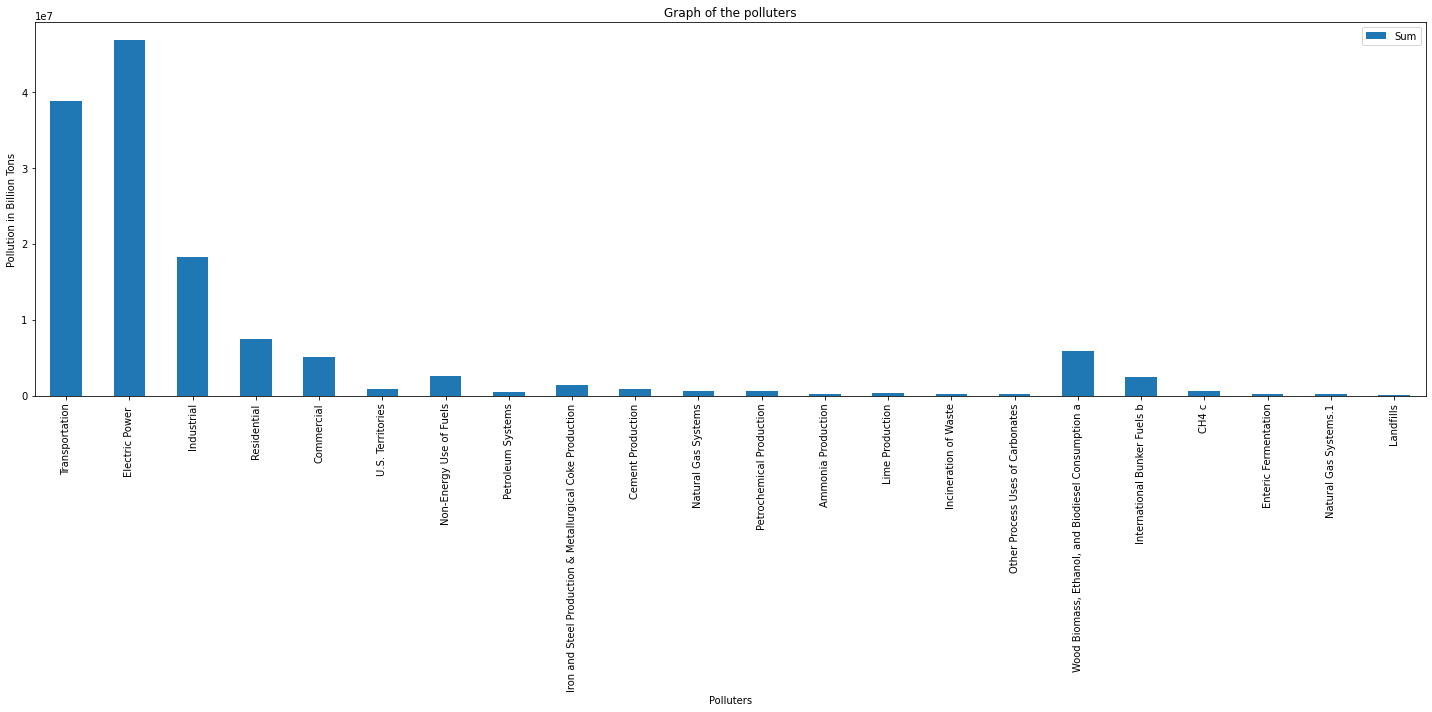

In [34]:
# Use DataFrame.plot() in order to create a bar chart of the data
sum_pollutants.plot(kind="bar", figsize=(20,10))

# Set a title for the chart
plt.title("Graph of the polluters")
plt.xlabel("Polluters")
plt.ylabel("Pollution in Billion Tons")

plt.tight_layout()

# Save the figure as a png file
plt.savefig("Major Polluters.png", bbox_inches='tight')

plt.show()


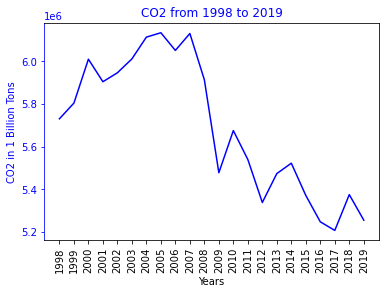

In [37]:
#Line graph of the major pollutants

fig, ax1 = plt.subplots()
x_axis = pollutants_cleaned.index
first = pollutants_cleaned['CO2']
second = pollutants_cleaned['Fossil Fuel Combustion']

ax1.plot(x_axis,first,color='blue')

# ax2 = ax1.twinx()
# ax2.yaxis.set_view_interval(5.2, 6.2)
# ax2.plot(x_axis,second,color='green')


ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 in 1 Billion Tons',color='blue')

ax1.set_title('CO2 from 1998 to 2019',color='blue')

ax1.tick_params(axis='y',colors='blue')

plt.xticks(pollutants_cleaned.index, rotation='vertical')
ax1.spines['left'].set_color('blue')

plt.show()

fig.savefig("CO2 over the years.png", bbox_inches='tight')

In [ ]:
#Line graph of the major polluter Transportation vs CO2 gas emission
fig, ax1 = plt.subplots()
x_axis = pollutants_cleaned.index
first = pollutants_cleaned['CO2']
second = pollutants_cleaned['Transportation']

ax1.plot(x_axis,first,color='blue')

ax2 = ax1.twinx()
ax2.yaxis.set_view_interval(5.2, 6.2)
ax2.plot(x_axis,second,color='red')


ax1.set_xlabel('Years')
ax1.set_ylabel('CO2  (1 billion Tons)' ,color='blue')
ax2.set_ylabel('Transportation (1 billion Tons)',color='red')
ax1.set_title('CO2 and Transportation',color='red')


ax1.tick_params(axis='y',colors='blue')
ax2.tick_params(axis='y',colors='red')


ax2.spines['right'].set_color('red')

ax2.spines['left'].set_color('blue')

plt.show()
plt.tight_layout()
fig.savefig("CO2 and Transportation.png", bbox_inches='tight')

The r-squared is: 0.29206924223161235


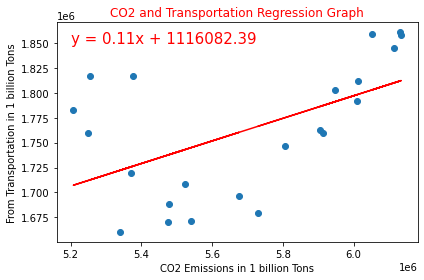

In [26]:

# Add the linear regression equation and line to plot
x_values = pollutants_cleaned['CO2']
y_values = pollutants_cleaned['Transportation']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5200000,1850000),fontsize=15,color="red")
plt.xlabel('CO2 Emissions in 1 billion Tons')
plt.ylabel('From Transportation in 1 billion Tons')
plt.title('CO2 and Transportation Regression Graph',color='red')
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("CO2 vs Transportation Regression Graph.png")

plt.show()





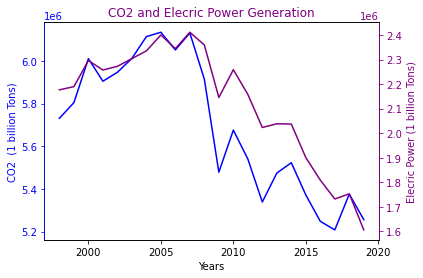

<Figure size 432x288 with 0 Axes>

In [20]:
#print(pollutants_cleaned['Electric Power '])
fig, ax1 = plt.subplots()
x_axis = pollutants_cleaned.index
first = pollutants_cleaned['CO2']
second = pollutants_cleaned['Electric Power ']

ax1.plot(x_axis,first,color='blue')

ax2 = ax1.twinx()
ax2.yaxis.set_view_interval(5.2, 6.2)
ax2.plot(x_axis,second,color='purple')


ax1.set_xlabel('Years')
ax1.set_ylabel('CO2  (1 billion Tons)' ,color='blue')
ax2.set_ylabel('Elecric Power (1 billion Tons)',color='purple')
ax1.set_title('CO2 and Elecric Power Generation',color='purple')


ax1.tick_params(axis='y',colors='blue')
ax2.tick_params(axis='y',colors='purple')


ax2.spines['right'].set_color('purple')

ax2.spines['left'].set_color('blue')

plt.show()
plt.tight_layout()
fig.savefig("CO2 and Electric Power Generation.png", bbox_inches='tight')

The r-squared is: 0.8389651034928138


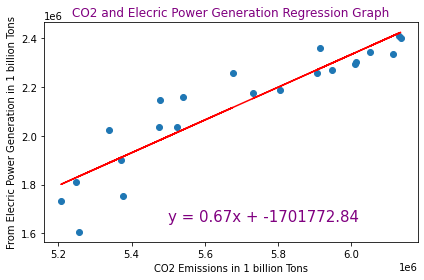

In [25]:
# Add the linear regression equation and line to plot
x_values = pollutants_cleaned['CO2']
y_values = pollutants_cleaned['Electric Power ']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5500000,1650000),fontsize=15,color="purple")
plt.xlabel('CO2 Emissions in 1 billion Tons')
plt.ylabel('From Elecric Power Generation in 1 billion Tons')
plt.title('CO2 and Elecric Power Generation Regression Graph',color='purple')
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("CO2 vs Elecric Power Generation Regression Graph.png")
plt.show()




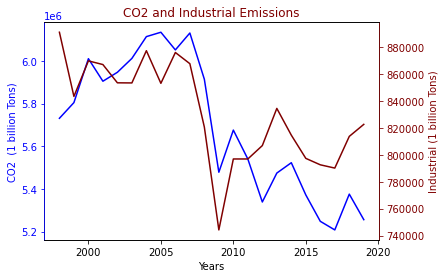

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax1 = plt.subplots()
x_axis = pollutants_cleaned.index
first = pollutants_cleaned['CO2']
second = pollutants_cleaned['Industrial']

ax1.plot(x_axis,first,color='blue')

ax2 = ax1.twinx()
ax2.yaxis.set_view_interval(5.2, 6.2)
ax2.plot(x_axis,second,color='maroon')


ax1.set_xlabel('Years')
ax1.set_ylabel('CO2  (1 billion Tons)' ,color='blue')
ax2.set_ylabel('Industrial (1 billion Tons)',color='maroon')
ax1.set_title('CO2 and Industrial Emissions',color='maroon')


ax1.tick_params(axis='y',colors='blue')
ax2.tick_params(axis='y',colors='maroon')


ax2.spines['right'].set_color('maroon')

ax2.spines['left'].set_color('blue')

plt.show()
plt.tight_layout()
fig.savefig("CO2 and Industrial Emission.png", bbox_inches='tight')

The r-squared is: 0.5585216672258988


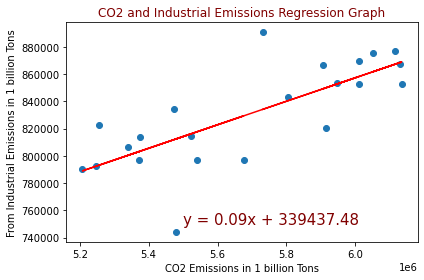

In [24]:
# Add the linear regression equation and line to plot
x_values = pollutants_cleaned['CO2']
y_values = pollutants_cleaned['Industrial']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5500000,750000),fontsize=15,color="maroon")
plt.xlabel('CO2 Emissions in 1 billion Tons')
plt.ylabel('From Industrial Emissions in 1 billion Tons')
plt.title('CO2 and Industrial Emissions Regression Graph',color='maroon')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("CO2 vs Industrial Emissions Regression Graph.png")
plt.show()

# plt.savefig("CO2 vs Industrial Emissions Regression Graph.png")
